# **Loads & Prepares Data**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loads data from the given file and extracts the ith column
# Normalises the data into (0,1) range
def read_data(file_name, i):
    dataset = pd.read_csv(file_name).iloc[:, [i]]
    data = np.array(dataset.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    return data

In [3]:
# Splits the given data into a training set and a testing set
# Based on split ratio
def get_train_test(data, split_percent):
    n = len(data)
    split = int(n * split_percent)
    train_data = data[:split]
    test_data = data[split:]
    return train_data, test_data

In [4]:
# Reshapes the given sequential data into a set of target variables and sets of features
# Based on the given time steps (number of rows in the RNN)
def get_XY(data, time_steps):
    y_indexes = np.arange(time_steps, len(data), time_steps)
    y_data = data[y_indexes]
    X_rows = len(y_data)
    X_data = data[range(X_rows*time_steps)]
    X_data = np.reshape(X_data, (X_rows, time_steps, 1))
    return X_data, y_data

# **Builds, Trains & Tests your RNN**


In [6]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [7]:
# Mounts Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Loads data for training and testing
data = read_data('/content/drive/MyDrive/AI Society/Tasla_Stock_Updated_V2.csv', 3)

# Splits the data into a training set and a testing set
train_data, test_data = get_train_test(data, 0.8)

# Reshapes the data
X_train_data, y_train_data = get_XY(train_data, 12)
X_test_data, y_test_data = get_XY(test_data, 12)

# Builds the model
RNN_model = tf.keras.Sequential()
RNN_model.add(tf.keras.Input(shape=(12, 1)))
RNN_model.add(tf.keras.layers.SimpleRNN(16, activation='tanh'))
RNN_model.add(tf.keras.layers.Dense(1, 'tanh'))

# Compiles the model
RNN_model.compile(optimizer='adam', loss='mean_squared_error')

# Trains the model
train_history = RNN_model.fit(X_train_data, y_train_data, epochs=100, batch_size=32)

# Evaluates the model on the test data
loss = RNN_model.evaluate(X_test_data, y_test_data)
print('Test model loss:', round(loss,4))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0604
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110  
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096  
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052  
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 
Epoch 16/100
5/5

#**Plots Predictions vs Actual Values Graph**

In [11]:
import matplotlib.pyplot as plt

In [17]:
# Plots a predictions vs actual values graph
def plot_lo(predictions, actual):
  plt.plot(predictions, label='predicted value')
  plt.plot(actual, label='actual value')
  plt.xlabel('Observation')
  plt.ylabel('Stock Price')
  plt.legend(['predicted value', 'actual value'])
  plt.grid(True)
  plt.show

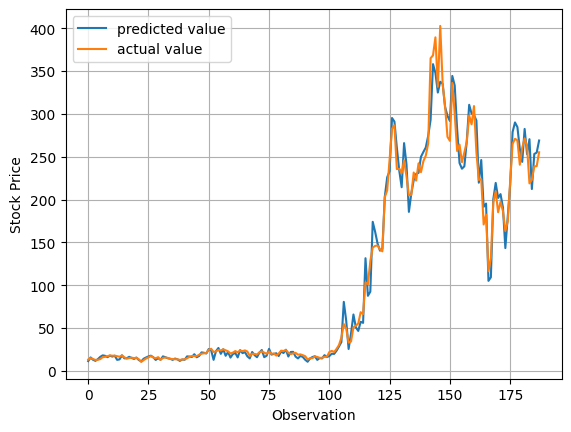

In [18]:
# Calculates the predictions
X_data = np.vstack((X_train_data, X_test_data))
predictions = RNN_model.predict(X_data, verbose = 0)

# Calculates the actual values
y_data = np.hstack((y_train_data, y_test_data))

# Finds the highest and lowest values in the data
prediction_dataset = pd.read_csv('/content/drive/MyDrive/AI Society/Tasla_Stock_Updated_V2.csv').iloc[:, [3]]
max = np.max(prediction_dataset)
min = np.min(prediction_dataset)

# Unscales the predictions and the actual values using these values
predictions = predictions * (max - min) + min
actual = y_data * (max - min) + min

# Plots the graph using the unscaled predictions and the unscaled actual values
plot_lo(predictions, actual)

#**Applies the Model**

In [16]:
# Loads data for predictions
prediction_data = read_data('/content/drive/MyDrive/AI Society/Tasla_Stock_Updated_V2.csv', 3)
X_prediction_data, y_prediction_data = get_XY(prediction_data, 12)

# Calculates the predictions
predictions = RNN_model.predict(X_prediction_data, verbose = 0)
predictions = predictions * (max - min) + min

# Stores the dates of the predictions
y_indexes = np.arange(12, len(prediction_data), 12)
dates = pd.read_csv('/content/drive/MyDrive/AI Society/Tasla_Stock_Updated_V2.csv').iloc[:, [1]]

# Displays the predictions in a readable format
j = 0
print('Predictions:')
for i in y_indexes:
    output = f'{predictions[j,0]} will be the highest Tesla stock price on {dates.iloc[i, 0]}.'
    j = j + 1
    print(output)

Predictions:
11.43431282043457 will be the highest Tesla stock price on 2015-01-21.
15.731059074401855 will be the highest Tesla stock price on 2015-02-06.
12.969785690307617 will be the highest Tesla stock price on 2015-02-25.
11.731148719787598 will be the highest Tesla stock price on 2015-03-13.
13.687078475952148 will be the highest Tesla stock price on 2015-03-31.
16.388031005859375 will be the highest Tesla stock price on 2015-04-17.
18.146556854248047 will be the highest Tesla stock price on 2015-05-05.
17.631559371948242 will be the highest Tesla stock price on 2015-05-21.
16.042930603027344 will be the highest Tesla stock price on 2015-06-09.
17.808860778808594 will be the highest Tesla stock price on 2015-06-25.
16.69717025756836 will be the highest Tesla stock price on 2015-07-14.
17.69200897216797 will be the highest Tesla stock price on 2015-07-30.
12.899762153625488 will be the highest Tesla stock price on 2015-08-17.
13.425117492675781 will be the highest Tesla stock pri